
<br>
**[Project Description]**
<br>

<br>

We have been provided a set of tweets from US airlines as well as their emotion. The job is to do airline_sentiment analysis on each major US airline's difficulties. Twitter data from February 2015 was scraped, and volunteers were requested to categorise positive, negative, and neutral messages before categorising negative causes (such as "late flight" or "rude service").

For example, it contains whether the airline_sentiment of the tweets in this set was positive, neutral, or negative for six US airlines:

The information of main attributes for this project as follows;

* **`alirline_airline_sentiment`** : airline_sentiment classification.(positivie, neutral, and negative)
* **`negativereason`** : Reason selected for the negative opinion
* **`airline`** : Name of 6 US Airlines('Delta', 'United', 'Southwest', 'US Airways', 'Virgin America', 'American')
* **`text`** : Customer's opinion

<br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
#import pylab
import warnings
warnings.filterwarnings('ignore')

import sqlite3

<br>

## Data Load

In [2]:
'''sql_connection = sqlite3.connect('database.sqlite')
query = "SELECT airline, text, negativereason, airline_airline_sentiment AS airline_sentiment FROM 'Tweets'"
df = pd.read_sql_query(sql = query, con = sql_connection)
display(df.shape, df.head(), df.info())'''

df = pd.read_csv('Tweets.csv')
display(df.shape, df.head(), df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

(14640, 15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


None

<br>

## EDA

### Total count per Airlines

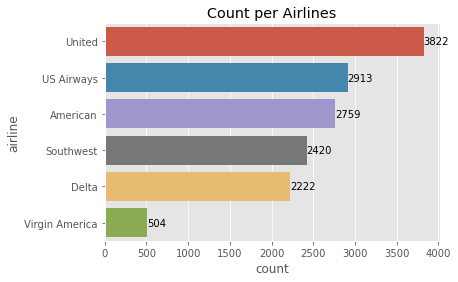

In [3]:
fig = sns.countplot(data=df,y = df['airline'],order=df['airline'].value_counts().index)
fig.bar_label(fig.containers[0])
fig.set_title('Count per Airlines',)
plt.show()

<br>

### Proportion of airline_sentiments

Text(0.5, 1.0, 'Overall Proportion of airline_sentiment')

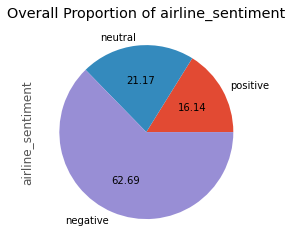

In [4]:
df.airline_sentiment.value_counts().sort_values().plot(kind='pie',autopct ='%.2f')
plt.title('Overall Proportion of airline_sentiment')

In [5]:
sen = df.groupby(['airline','airline_sentiment'])['airline_sentiment'].count().unstack()
sen

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


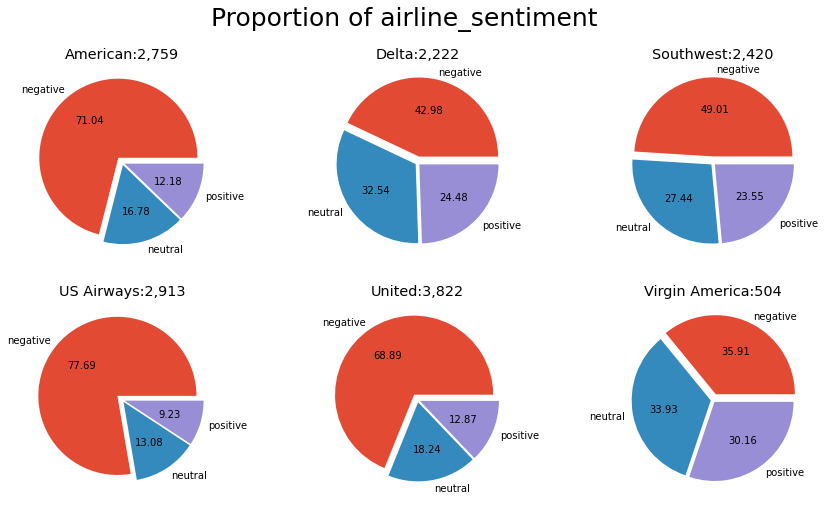

In [6]:
fig = plt.subplots(2, 3, figsize = (15, 8))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    sen.iloc[i].plot(kind='pie',
                     labels = sen.iloc[i].index,
                     autopct = '%.2f',
                     explode = [0.08, 0.03, 0.03],
                     ylabel = '')

    plt.gca().set_title(f"{sen.index[i]}:{format(sen.values[i].sum(),',')}")

plt.suptitle("Proportion of airline_sentiment", fontsize = 25)
plt.show()

I believe it would be fascinating to compare Twitter data with other real-world statistics to assess the consistency of customer opinion towards each airline.

<br>

### Now, let's see the reasons for negative airline_sentiment

In [7]:
print(df['negativereason'].unique())

[nan 'Bad Flight' "Can't Tell" 'Late Flight' 'Customer Service Issue'
 'Flight Booking Problems' 'Lost Luggage' 'Flight Attendant Complaints'
 'Cancelled Flight' 'Damaged Luggage' 'longlines']


###### There might be a chance that users might have added something in negative reasons while giving postive tweet, so let's find out that too

In [8]:
print(df[df['negativereason']=='']['airline_sentiment'].unique())
print(df[df['negativereason']!='']['airline_sentiment'].unique())

[]
['neutral' 'positive' 'negative']


As we can see that negative airline_sentiment only has the value of negativereason.

In [9]:
df_neg_sen = df[df['airline_sentiment']=='negative']
display(df_neg_sen.shape , df_neg_sen.head())

(9178, 15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


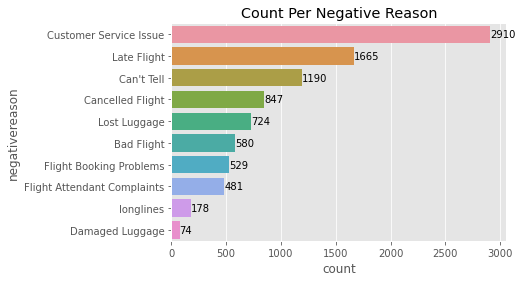

In [10]:
fig = sns.countplot(data =df_neg_sen,
              y='negativereason',
              order = df_neg_sen['negativereason'].value_counts().index)
fig.bar_label(fig.containers[0])
fig.set_title('Count Per Negative Reason')
plt.show()

The most of the users complains concerning about customer service issue's

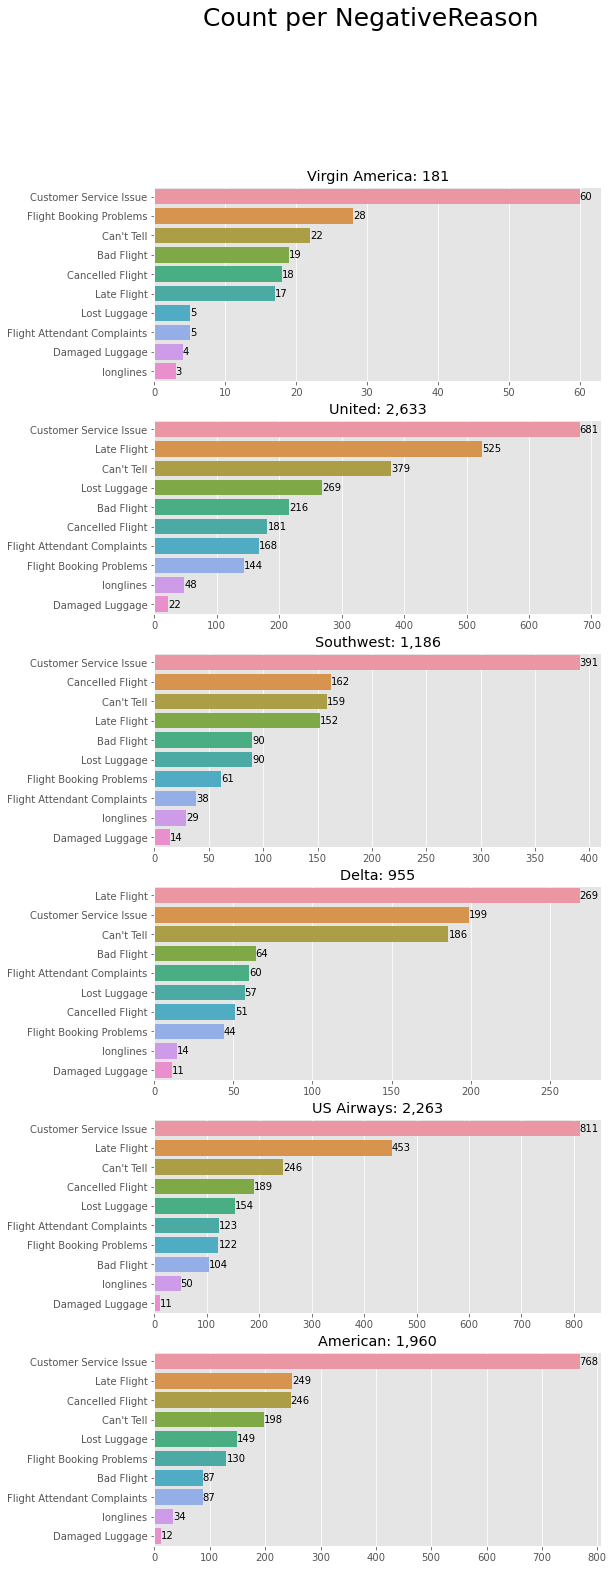

In [11]:
fig = plt.subplots(6,1,figsize=(8, 25))
names = df_neg_sen['airline'].unique()
count = 1

for i in names:
    if(count<7):
        plt.subplot(6,1,count)
        fig = sns.countplot(data = df_neg_sen[df_neg_sen['airline']==i],
                            y='negativereason',
                            order= df_neg_sen[df_neg_sen['airline']==i]['negativereason'].value_counts().index)
        fig.set_title(f"{i}: {format(len(df_neg_sen[df_neg_sen.airline==i]),',')}")
        fig.bar_label(fig.containers[0])
        fig.set_ylabel('')
        fig.set_xlabel('')
        count+=1

plt.suptitle("Count per NegativeReason",fontsize = 25)
plt.show()


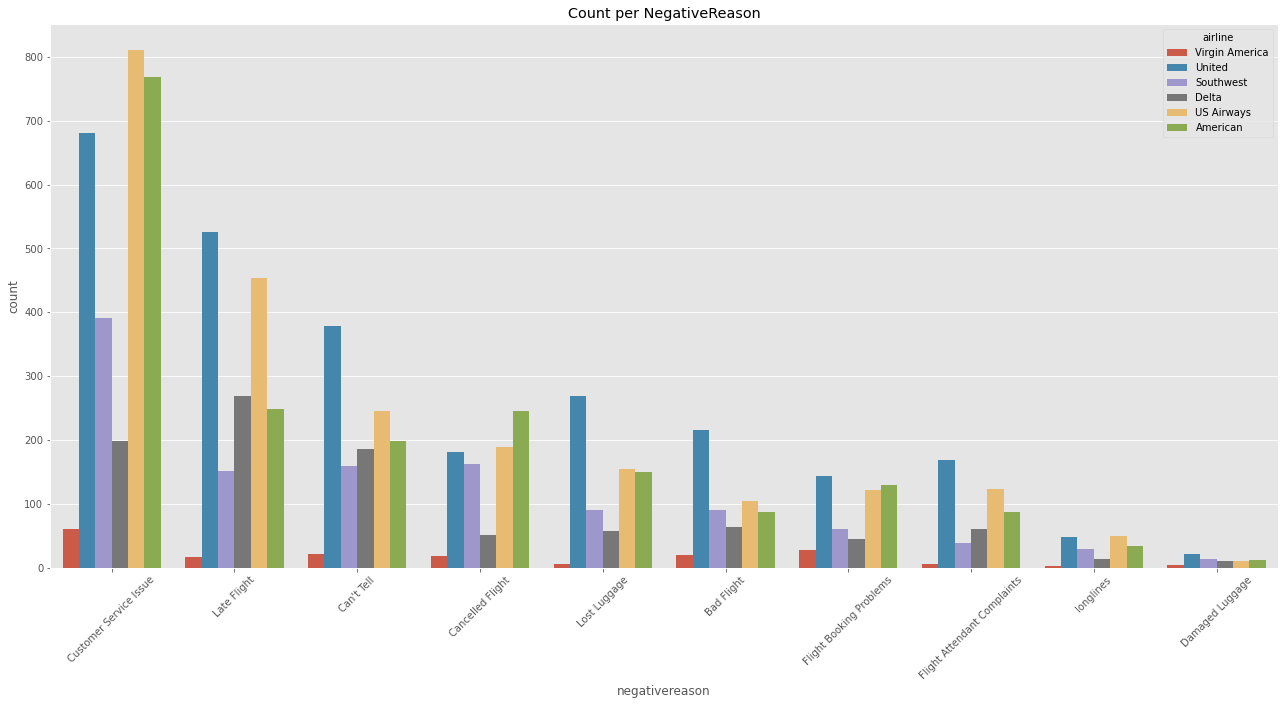

In [12]:
plt.figure(figsize=(22,10))
fig = sns.countplot(data = df_neg_sen,x ='negativereason',hue='airline',order = df_neg_sen.negativereason.value_counts().index)
plt.xticks(rotation=45)
fig.set_title('Count per NegativeReason')
plt.show()

In [13]:
names = df_neg_sen['airline'].unique()
for i in names:
    per = (len(df_neg_sen[df_neg_sen['airline']==i]) / len(df[df['airline']==i])*100)
    per =round(per,1)
    print(i +' : '+'Out of total '+str(len(df[df['airline']==i]))+', '+ str(per)+ '% feel negative')

Virgin America : Out of total 504, 35.9% feel negative
United : Out of total 3822, 68.9% feel negative
Southwest : Out of total 2420, 49.0% feel negative
Delta : Out of total 2222, 43.0% feel negative
US Airways : Out of total 2913, 77.7% feel negative
American : Out of total 2759, 71.0% feel negative


<br>

* **`American, US Airways, Southwest`** : Customer service complaints are relatively common.
* **`United`** : Customer service is the most problematic, although this airline's clients encountered delayed flights more frequently than others. The number of lost baggage incidents was rather high.
* **`Delta`** : Although the customer service appears to be satisfactory, the majority of passengers had delayed flights.
* **`Virgin America`** : Customer service is the most important issue, followed by a flight booking issue.

<br>

## Text Proprocessing

<AxesSubplot:xlabel='text', ylabel='Density'>

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: text, dtype: float64

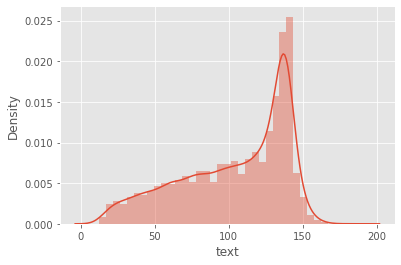

In [14]:
display(sns.distplot(df.text.str.len()),df.text.str.len().describe())

By looking at above insight:
* On average, tweet text is 103 characters long.
* The minimum length is 12 and the maximum length is 186.

<br>
**We will be filtering the text through 3 steps **

* Keeping only Regular Expression
* Tokenization
* Checking Stopwords ( such as aritcle, comjunctions,etc )

In [15]:
print(df.text[5].split())

['@VirginAmerica', 'seriously', 'would', 'pay', '$30', 'a', 'flight', 'for', 'seats', 'that', "didn't", 'have', 'this', 'playing.', "it's", 'really', 'the', 'only', 'bad', 'thing', 'about', 'flying', 'VA']


In [61]:
!pip install nltk

In [16]:
import re
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\retee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\retee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern,'',d)
    return text

names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']

def clean_stopword(d):
    stop_words = stopwords.words('english')
    for i in names:
        stop_words.append(i)
    return " ".join([x.lower() for x in d.split() if x.lower() not in stop_words and len(x) > 1  ])


def tokenize(d):
    return word_tokenize(d)

In [18]:
df['filtered_text']= df.text.apply(clean_text).apply(clean_stopword).apply(tokenize)
df['filtered_text'].head()

0                                     [dhepburn, said]
1    [plus, youve, added, commercials, experience, ...
2    [didnt, today, must, mean, need, take, another...
3    [really, aggressive, blast, obnoxious, enterta...
4                            [really, big, bad, thing]
Name: filtered_text, dtype: object

In [19]:
print(' '.join(df.filtered_text[0]))

dhepburn said


<br>

## Text Analysis

<br>
<p>
I will be using **`Vader Lexicon Based Approach`**

Vader is a lexicon meant to analyse airline_sentiment in social media text data. It computes the negative, neutral, and positive evaluations of each word in the phrase and provides the compounded polarity score of the sentence. Vader from the nltk inner module and the Python API vaderairline_sentiment may both be utilised. VADER has several advantages over traditional airline_sentiment analysis methodologies.
    </p>
<br>


In [20]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
pred = vader.polarity_scores(" ".join(df.filtered_text[0]))
print('Expected Classification ouput : '+str(pred),'/n')
print('Actual Classification ouput : '+df['airline_sentiment'][0],'/n')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\retee\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Expected Classification ouput : {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} /n
Actual Classification ouput : neutral /n


<div class="alert alert-block alert-warning">
<b>Alert:</b>
<br>
We recognise that certain unambiguous statements can be classed substantially identically to the actual categorization.
However, confusing (or satirical) sentences such as:
* Wanted to get my bag benefit, but instead get $25 pricing on all three tickets. When adding a card, MP Visa is only option. @united
* @SouthwestAir I'm an A-list Preferred customer and very loyal SWA. However, your inflight wifi is no better today than it was 4 years ago.

Vader did not always do well in classifying true emotion, demonstrating both the limitations of existing NLP and the path forward.


</div>

<br>

### WordCloud : Keyword analysis

WordCloud is a simple approach to illustrate which words appear most frequently in a group of phrases.

However, if no suitable text preparation is performed before to drawing it, it may be merely one of several bits of visulalization.

In [67]:
from wordcloud import WordCloud

In [68]:
# preprocessing before drawing wordcloud separating the sentiment.
pos = df[df['airline_sentiment']=='positive'].text.apply(clean_text).apply(clean_stopword).apply(tokenize)
pos = [" ".join(pos.values[i]) for i in range(len(pos))]
pos = [" ".join(pos)][0]

neu = df[df['airline_sentiment']=='neutral'].text.apply(clean_text).apply(clean_stopword).apply(tokenize)
neu = [" ".join(neu.values[i]) for i in range(len(neu))]
neu = [" ".join(neu)][0]

neg = df[df['airline_sentiment']=='negative'].text.apply(clean_text).apply(clean_stopword).apply(tokenize)
neg = [" ".join(neg.values[i]) for i in range(len(neg))]
neg = [" ".join(neg)][0]


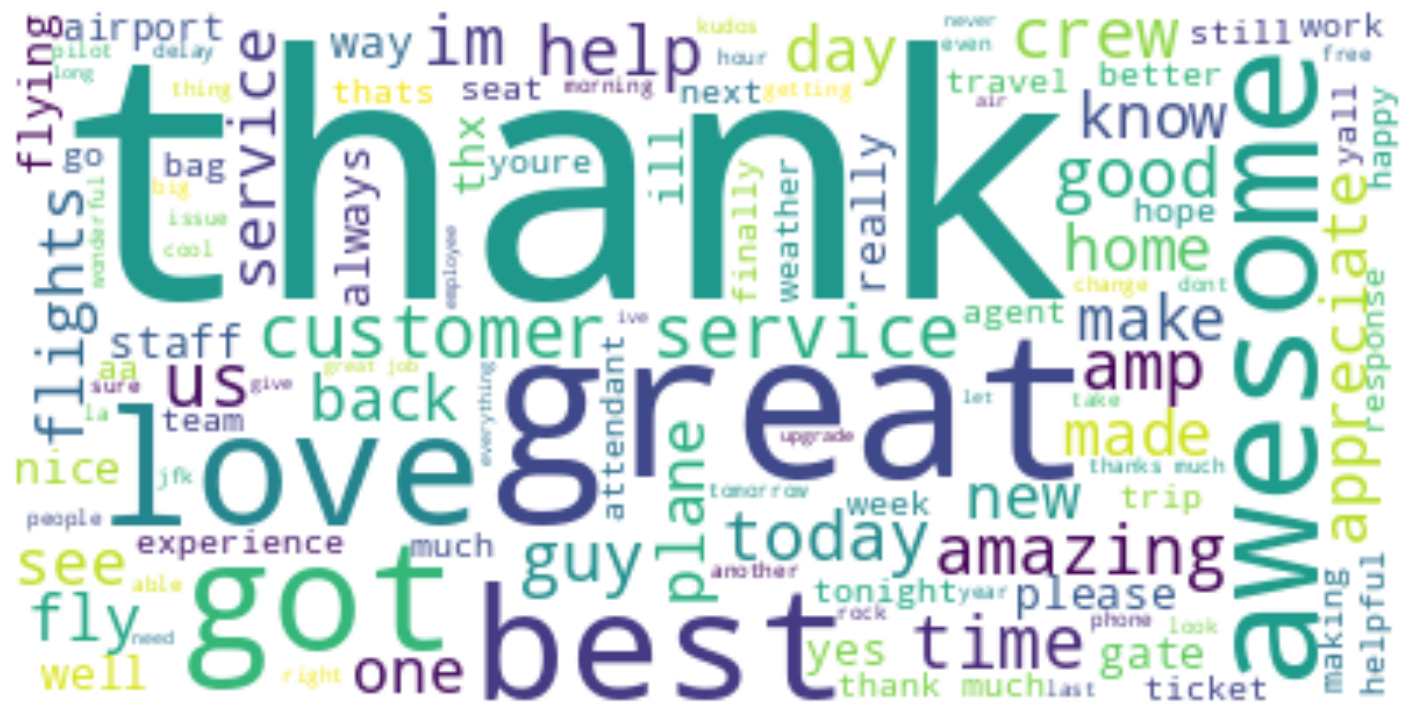

In [69]:
# For Positive
plt.figure(figsize=(18,15))
word_cloud_pos = WordCloud(background_color='white').generate(pos)
plt.imshow(word_cloud_pos,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

There are numerous positive words such as 'thank you,' 'wonderful,' 'love,' and so on.

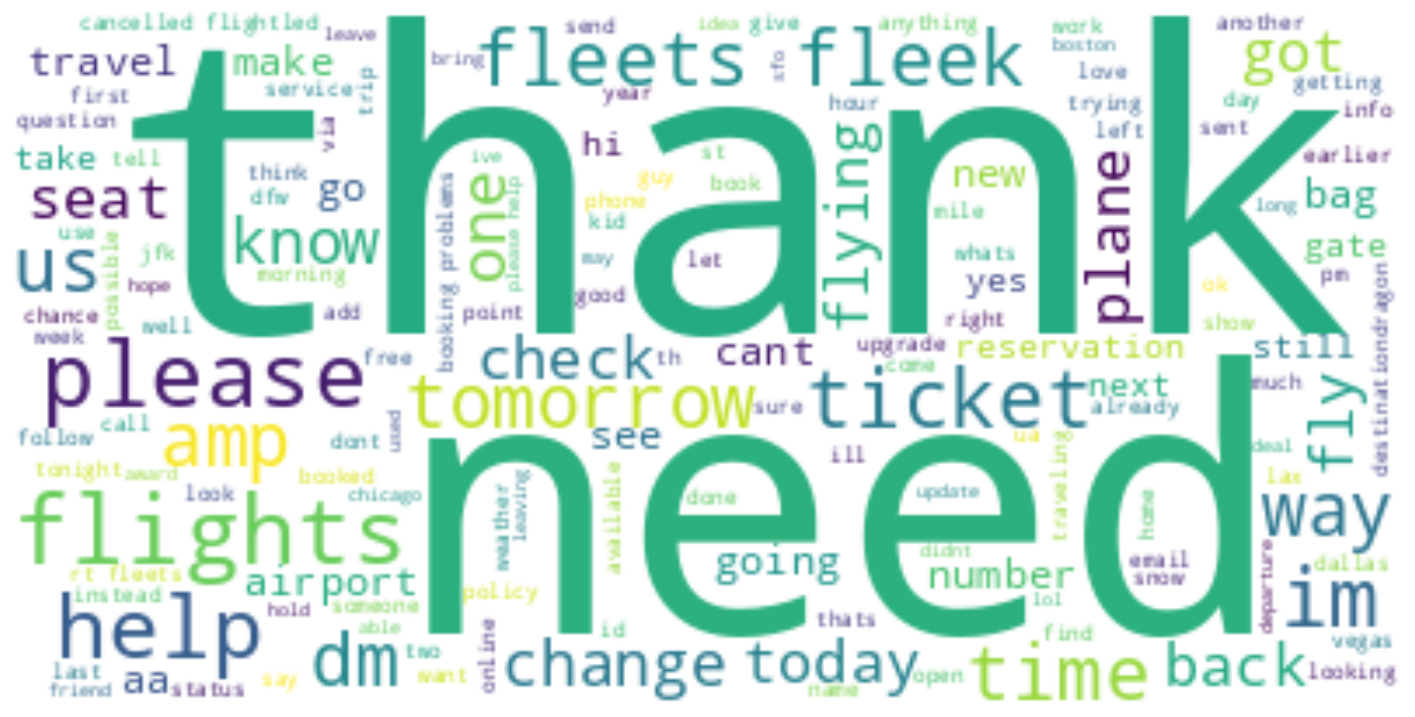

In [70]:
# For Neutral
plt.figure(figsize=(18,15))
word_cloud_pos = WordCloud(background_color='white').generate(neu)
plt.imshow(word_cloud_pos,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

The primary terms we notice in the WC of negative attitude are 'plane,' 'bag,' 'time,' 'customer,''service,' and so on.

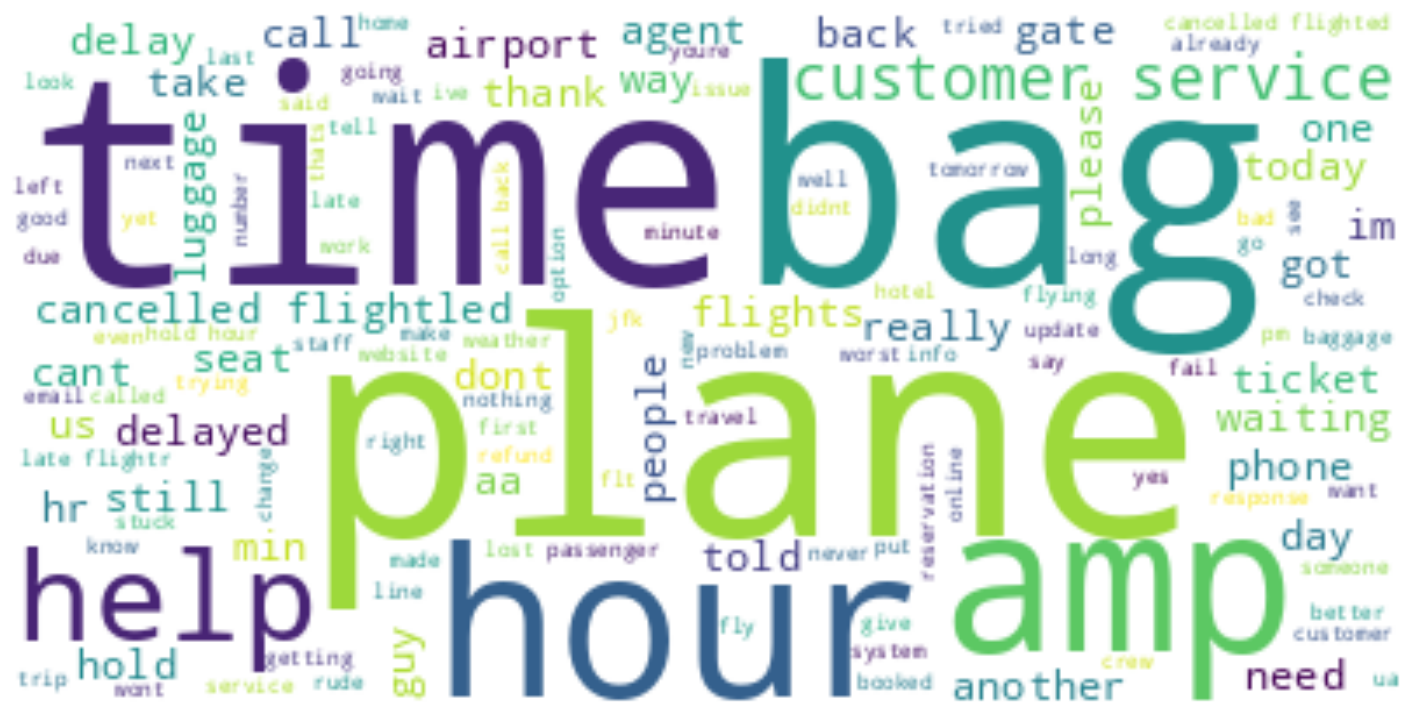

In [71]:
# For Negative
plt.figure(figsize=(18,15))
word_cloud_pos = WordCloud(background_color='white').generate(neg)
plt.imshow(word_cloud_pos,interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.grid(False)

Neutral is just neutral. At first sight, the only word that stands out is "thank you." There are hardly no negative or positive terms.

<br>

## Machine Learning Model Approach ( coming_soon...)